In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys, warnings
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate_nn as srnn
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, TensorDataset
warnings.filterwarnings('ignore')

In [2]:
L63_data_path = '../data/L63-trajectories'
save_folder = '../data/nn_2'
N = 20
train = np.load(f'{L63_data_path}/train.npy')[:, :N].astype(np.float32)
test = np.load(f'{L63_data_path}/test.npy')[:, :, :1000].astype(np.float32)

model = srnn.SurrogateModel_NN(3, 300, name='test_model', save_folder=)
# model.learn(train, steps=1000000, learning_rate=1e-2, drop=0.5)

In [3]:
iters = list(range(0, 100000, 1000))
tau = np.zeros(len(iters))
for i, iter in enumerate(iters):
    model.net = torch.load(f'../data/nn_70_2/nn_{iter}')
    tau_f_rmse, tau_f_se, rmse, se = model.compute_tau_f(test[:100], error_threshold=0.05)
    tau[i] = tau_f_se.mean()
    print(i)

Time taken by compute_tau_f is 1.3187 seconds
0
Time taken by compute_tau_f is 1.3248 seconds
1
Time taken by compute_tau_f is 1.3057 seconds
2
Time taken by compute_tau_f is 1.3153 seconds
3
Time taken by compute_tau_f is 1.3023 seconds
4
Time taken by compute_tau_f is 1.3031 seconds
5
Time taken by compute_tau_f is 1.3049 seconds
6
Time taken by compute_tau_f is 1.3150 seconds
7
Time taken by compute_tau_f is 1.3010 seconds
8
Time taken by compute_tau_f is 1.3231 seconds
9
Time taken by compute_tau_f is 1.3151 seconds
10
Time taken by compute_tau_f is 1.3102 seconds
11
Time taken by compute_tau_f is 1.2957 seconds
12
Time taken by compute_tau_f is 1.3092 seconds
13
Time taken by compute_tau_f is 1.3145 seconds
14
Time taken by compute_tau_f is 1.3691 seconds
15
Time taken by compute_tau_f is 1.4030 seconds
16
Time taken by compute_tau_f is 1.3432 seconds
17
Time taken by compute_tau_f is 1.3534 seconds
18
Time taken by compute_tau_f is 1.3822 seconds
19
Time taken by compute_tau_f is

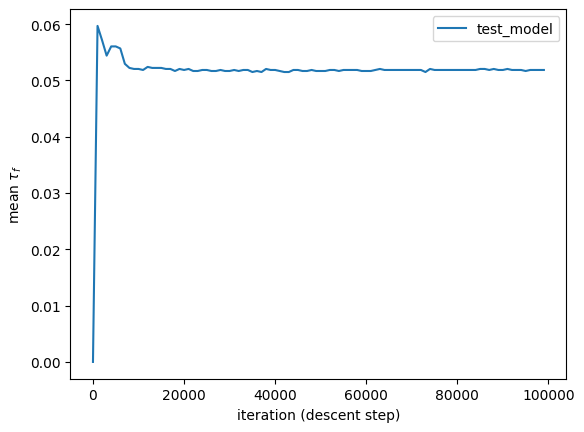

In [4]:
plt.plot(iters, tau, label="test_model")
plt.xlabel('iteration (descent step)')
plt.ylabel(r'mean $\tau_f$')
plt.legend()
plt.savefig('../data/nn_70_2/iter_vs_mean_tau_f.png')

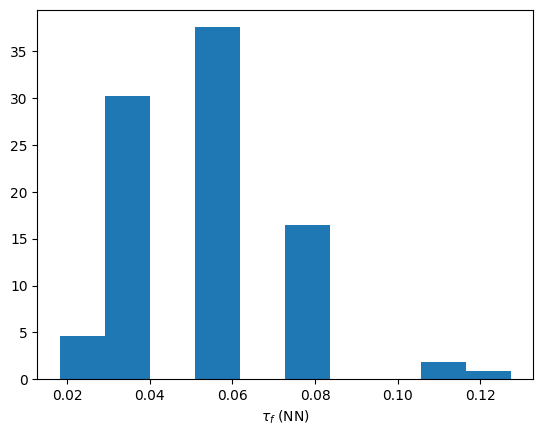

In [5]:
plt.hist(tau_f_se, density=True)
plt.xlabel(r'$\tau_f$ (NN)')
plt.savefig('../data/plots/tau_f_NN.png')
# plt.title(f'training_data_size={N}')

In [6]:
tau_f_rmse, tau_f_se, rmse, se = model.compute_tau_f(train.T.reshape(-1, 3, 800))

plt.hist(tau_f_se)
plt.xlabel(r'$\tau_f$ (NN), for train data')
plt.title(f'training_data_size={N}')

ValueError: cannot reshape array of size 60 into shape (3,800)

In [10]:
for k, v in model.net.state_dict().items():
    print(k)

0.weight
0.bias
2.weight


In [ ]:
for batch, (X, y) in enumerate(train_dataloader):
    print(X, y)

In [ ]:
fig, N, dt = plt.figure(figsize=(8, 8)), 500, 0.02
t = np.arange(0., N*dt, dt) / (1/0.91)
axs = [fig.add_subplot(311), fig.add_subplot(312), fig.add_subplot(313)]
dims = ['x', 'y', 'z']
u = np.load('{}/validation.npy'.format(L63_data_path)).astype(np.float32)
u = train
idx = [[4, 14, 18], [13, 17, 46], [13, 2, 31], ]
labels = ['good', 'medium', 'bad']
predicted = model.multistep_forecast(u[:, 0], N)
for i, ax in enumerate(axs):
    ax.plot(t, u[i, :N], label='truth')
    ax.plot(t, predicted[i, :N], label='network')
    ax.legend(loc='upper right')
    if i == len(dims)-1:
        ax.set_xlabel('t')
    ax.set_ylabel(dims[i])